In [1]:
import requests
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import IFrame


c:\python27\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
sns.set_color_codes()
sns.set_style("white")

The player that will be extracted is the game 6 of the Clippers-Rockets playoff series (an amazing comback for Houston Rockets). In the play,Dwight set a screen for Terry, and Terry passed the ball to Josh Smith for an open three. 

In [3]:
IFrame('http://stats.nba.com/movement/#!/?GameID=0041400236&GameEventID=534',
              width=700, height=400)

In [4]:
url = "http://stats.nba.com/stats/locations_getmoments/?eventid=534&gameid=0041400236"

In [5]:
# Get the webpage
response = requests.get(url)
response.json().keys()

[u'moments', u'visitor', u'gamedate', u'gameid', u'home']

In [6]:
home = response.json()["home"]
visitor = response.json()["visitor"]
moments = response.json()["moments"]

In [7]:
visitor

{u'abbreviation': u'HOU',
 u'name': u'Houston Rockets',
 u'players': [{u'firstname': u'Jason',
   u'jersey': u'31',
   u'lastname': u'Terry',
   u'playerid': 1891,
   u'position': u'G'},
  {u'firstname': u'Dwight',
   u'jersey': u'12',
   u'lastname': u'Howard',
   u'playerid': 2730,
   u'position': u'C'},
  {u'firstname': u'Josh',
   u'jersey': u'5',
   u'lastname': u'Smith',
   u'playerid': 2746,
   u'position': u'F'},
  {u'firstname': u'Trevor',
   u'jersey': u'1',
   u'lastname': u'Ariza',
   u'playerid': 2772,
   u'position': u'F'},
  {u'firstname': u'Corey',
   u'jersey': u'33',
   u'lastname': u'Brewer',
   u'playerid': 201147,
   u'position': u'G-F'},
  {u'firstname': u'Joey',
   u'jersey': u'8',
   u'lastname': u'Dorsey',
   u'playerid': 201595,
   u'position': u'C-F'},
  {u'firstname': u'James',
   u'jersey': u'13',
   u'lastname': u'Harden',
   u'playerid': 201935,
   u'position': u'G'},
  {u'firstname': u'Terrence',
   u'jersey': u'6',
   u'lastname': u'Jones',
   u'playeri

In [8]:
home

{u'abbreviation': u'LAC',
 u'name': u'Los Angeles Clippers',
 u'players': [{u'firstname': u'Jamal',
   u'jersey': u'11',
   u'lastname': u'Crawford',
   u'playerid': 2037,
   u'position': u'G'},
  {u'firstname': u'Hedo',
   u'jersey': u'15',
   u'lastname': u'Turkoglu',
   u'playerid': 2045,
   u'position': u'F'},
  {u'firstname': u'Matt',
   u'jersey': u'22',
   u'lastname': u'Barnes',
   u'playerid': 2440,
   u'position': u'F'},
  {u'firstname': u'Dahntay',
   u'jersey': u'31',
   u'lastname': u'Jones',
   u'playerid': 2563,
   u'position': u'G-F'},
  {u'firstname': u'Chris',
   u'jersey': u'3',
   u'lastname': u'Paul',
   u'playerid': 101108,
   u'position': u'G'},
  {u'firstname': u'JJ',
   u'jersey': u'4',
   u'lastname': u'Redick',
   u'playerid': 200755,
   u'position': u'G'},
  {u'firstname': u'Spencer',
   u'jersey': u'10',
   u'lastname': u'Hawes',
   u'playerid': 201150,
   u'position': u'F-C'},
  {u'firstname': u'Glen',
   u'jersey': u'0',
   u'lastname': u'Davis',
   u'pla

In [9]:
#check the length (700 items that compose the animation above)
len(moments)

700

Now, let's look at what information does the moments contain. 
1. The first item is the quarter that this moment occurred in. 
2. Not sure about the second item. 
3. The 3rd item is the time left in the game clock. 
4. The 4th item is the time left on the shot clock. 
5. Not sure about the 5th item
6. This item contains a list of 11 lists. The first list contains the information of the ball. The rest of the 10 lists contains information of 10 players on the court. 

In [10]:
moments[0]

[4,
 1431665961011L,
 401.02,
 20.49,
 None,
 [[-1, -1, 45.47706, 44.66605, 0.71701],
  [1610612746, 2440, 21.98947, 43.96255, 0.0],
  [1610612746, 200755, 17.03849, 7.19367, 0.0],
  [1610612746, 101108, 33.79907, 37.40691, 0.0],
  [1610612746, 201599, 24.7402, 29.80876, 0.0],
  [1610612746, 201933, 29.98772, 23.55346, 0.0],
  [1610612745, 1891, 46.79906, 46.21247, 0.0],
  [1610612745, 2772, 22.30123, 0.9746, 0.0],
  [1610612745, 2730, 52.72143, 28.74668, 0.0],
  [1610612745, 2746, 58.29529, 21.30605, 0.0],
  [1610612745, 201147, 25.49182, 48.82225, 0.0]]]

In [11]:
# Column labels
headers = ['team_id','player_id','x_loc','y_loc','radius','moment','game_clock','shot_clock']

In [12]:
player_moments = []
for moment in moments:
    for player in moment[5]:
        player.extend((moments.index(moment),moment[2],moment[3]))
        player_moments.append(player)

In [13]:
player_moments[0:11]
df = pd.DataFrame(player_moments,columns=headers)
df.head(11)

,team_id,player_id,x_loc,y_loc,radius,moment,game_clock,shot_clock
0,-1,-1,45.47706,44.66605,0.71701,0,401.02,20.49
1,1610612746,2440,21.98947,43.96255,0.00000,0,401.02,20.49
2,1610612746,200755,17.03849,7.19367,0.00000,0,401.02,20.49
3,1610612746,101108,33.79907,37.40691,0.00000,0,401.02,20.49
4,1610612746,201599,24.74020,29.80876,0.00000,0,401.02,20.49
5,1610612746,201933,29.98772,23.55346,0.00000,0,401.02,20.49
6,1610612745,1891,46.79906,46.21247,0.00000,0,401.02,20.49
7,1610612745,2772,22.30123,0.97460,0.00000,0,401.02,20.49
8,1610612745,2730,52.72143,28.74668,0.00000,0,401.02,20.49
9,1610612745,2746,58.29529,21.30605,0.00000,0,401.02,20.49


In [14]:
players=[]
players = visitor["players"]
players.extend(home["players"])
players

[{u'firstname': u'Jason',
  u'jersey': u'31',
  u'lastname': u'Terry',
  u'playerid': 1891,
  u'position': u'G'},
 {u'firstname': u'Dwight',
  u'jersey': u'12',
  u'lastname': u'Howard',
  u'playerid': 2730,
  u'position': u'C'},
 {u'firstname': u'Josh',
  u'jersey': u'5',
  u'lastname': u'Smith',
  u'playerid': 2746,
  u'position': u'F'},
 {u'firstname': u'Trevor',
  u'jersey': u'1',
  u'lastname': u'Ariza',
  u'playerid': 2772,
  u'position': u'F'},
 {u'firstname': u'Corey',
  u'jersey': u'33',
  u'lastname': u'Brewer',
  u'playerid': 201147,
  u'position': u'G-F'},
 {u'firstname': u'Joey',
  u'jersey': u'8',
  u'lastname': u'Dorsey',
  u'playerid': 201595,
  u'position': u'C-F'},
 {u'firstname': u'James',
  u'jersey': u'13',
  u'lastname': u'Harden',
  u'playerid': 201935,
  u'position': u'G'},
 {u'firstname': u'Terrence',
  u'jersey': u'6',
  u'lastname': u'Jones',
  u'playerid': 203093,
  u'position': u'F'},
 {u'firstname': u'Kostas',
  u'jersey': u'16',
  u'lastname': u'Papanikol

In [15]:
id_dict={}
for player in players:
    id_dict[player['playerid']] = [player["firstname"]+" "+player["lastname"],
                                   player["jersey"]]


In [16]:
id_dict

{1891: [u'Jason Terry', u'31'],
 2037: [u'Jamal Crawford', u'11'],
 2045: [u'Hedo Turkoglu', u'15'],
 2440: [u'Matt Barnes', u'22'],
 2563: [u'Dahntay Jones', u'31'],
 2730: [u'Dwight Howard', u'12'],
 2746: [u'Josh Smith', u'5'],
 2772: [u'Trevor Ariza', u'1'],
 101108: [u'Chris Paul', u'3'],
 200755: [u'JJ Redick', u'4'],
 201147: [u'Corey Brewer', u'33'],
 201150: [u'Spencer Hawes', u'10'],
 201175: [u'Glen Davis', u'0'],
 201595: [u'Joey Dorsey', u'8'],
 201599: [u'DeAndre Jordan', u'6'],
 201933: [u'Blake Griffin', u'32'],
 201935: [u'James Harden', u'13'],
 201991: [u'Lester Hudson', u'14'],
 202327: [u'Ekpe Udoh', u'13'],
 203085: [u'Austin Rivers', u'25'],
 203093: [u'Terrence Jones', u'6'],
 203123: [u'Kostas Papanikolaou', u'16'],
 203143: [u'Pablo Prigioni', u'9'],
 203909: [u'KJ McDaniels', u'32'],
 203910: [u'Nick Johnson', u'3'],
 203991: [u'Clint Capela', u'15']}

In [18]:
id_dict.update({-1:['ball',np.nan]})

In [ ]:
#df.player_id

In [19]:
df["player_name"] = df.player_id.map(lambda x: id_dict[x][0])
df["player_jersey"] = df.player_id.map(lambda x:id_dict[x][1])
df.head(11)

,team_id,player_id,x_loc,y_loc,radius,moment,game_clock,shot_clock,player_name,player_jersey
0,-1,-1,45.47706,44.66605,0.71701,0,401.02,20.49,ball,NaN
1,1610612746,2440,21.98947,43.96255,0.00000,0,401.02,20.49,Matt Barnes,22
2,1610612746,200755,17.03849,7.19367,0.00000,0,401.02,20.49,JJ Redick,4
3,1610612746,101108,33.79907,37.40691,0.00000,0,401.02,20.49,Chris Paul,3
4,1610612746,201599,24.74020,29.80876,0.00000,0,401.02,20.49,DeAndre Jordan,6
5,1610612746,201933,29.98772,23.55346,0.00000,0,401.02,20.49,Blake Griffin,32
6,1610612745,1891,46.79906,46.21247,0.00000,0,401.02,20.49,Jason Terry,31
7,1610612745,2772,22.30123,0.97460,0.00000,0,401.02,20.49,Trevor Ariza,1
8,1610612745,2730,52.72143,28.74668,0.00000,0,401.02,20.49,Dwight Howard,12
9,1610612745,2746,58.29529,21.30605,0.00000,0,401.02,20.49,Josh Smith,5


## Plotting the Movements

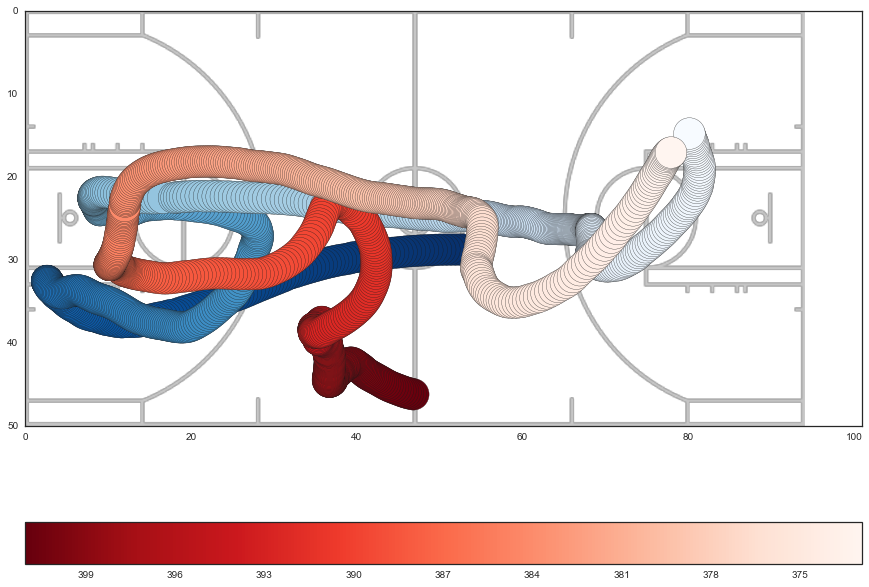

In [20]:
# get Dwight's movements
dh = df[df.player_name=="Dwight Howard"]
# read in the court png file
court = plt.imread("fullcourt.png")
plt.figure(figsize=(15, 11.5))

# Plot the movemnts as scatter plot
# using a colormap to show change in game clock
plt.scatter(dh.x_loc, dh.y_loc, c=dh.game_clock,
            cmap=plt.cm.Blues, s=1000, zorder=1)
jt = df[df.player_name=="Jason Terry"]
plt.scatter(jt.x_loc, jt.y_loc, c=jt.game_clock,
            cmap=plt.cm.Reds, s=1000, zorder=1)

# Darker colors represent moments earlier on in the game
cbar = plt.colorbar(orientation="horizontal")
cbar.ax.invert_xaxis()

#The original x=0,y=0 represents the top left corner
plt.imshow(court, zorder=0, extent=[0,94,50,0])

plt.xlim(0,101)

plt.show()

## Traveled Distance Calculation

In [ ]:
#df[df.player_name=="Dwight Howard"]

In [21]:
def travel_dist(player_locations):
    # get the differences for each column
    diff = np.diff(player_locations, axis=0)
    dist = np.sqrt((diff ** 2).sum(axis=1))
    # Then return the sum of all the distances
    return dist.sum()

dist = travel_dist(dh[['x_loc','y_loc']])
dist

197.39052411683639

In [22]:
player_travel_dist = df.groupby('player_name')[['x_loc', 'y_loc']].apply(travel_dist)
player_travel_dist

player_name
Blake Griffin     124.776708
Chris Paul        155.088187
Corey Brewer      149.936492
DeAndre Jordan    155.546752
Dwight Howard     197.390524
JJ Redick         194.552985
Jason Terry       170.436101
Josh Smith        157.699968
Matt Barnes       150.321116
Trevor Ariza      169.289797
ball              323.314884
dtype: float64

## Average Speed Caculation

In [23]:
elapse_time = df.game_clock.max()-df.game_clock.min()
# feet per second
dwight_fps = dist/elapse_time
#convert to miles per hour
dwight_mph = 0.681818*dwight_fps
dwight_mph

4.7877770320986608

In [24]:
player_speed = (player_travel_dist/elapse_time)*0.681818
player_speed

player_name
Blake Griffin     3.026503
Chris Paul        3.761719
Corey Brewer      3.636763
DeAndre Jordan    3.772842
Dwight Howard     4.787777
JJ Redick         4.718952
Jason Terry       4.133988
Josh Smith        3.825069
Matt Barnes       3.646092
Trevor Ariza      4.106184
ball              7.842117
dtype: float64

## Distance Between Players

In [25]:
dwight_loc = df[df["player_name"]=="Dwight Howard"][["x_loc","y_loc"]]
dwight_loc.head()

,x_loc,y_loc
8,52.72143,28.74668
19,52.15728,28.74631
30,51.60918,28.74672
41,51.07417,28.74965
52,50.56203,28.75389


In [26]:
other_players = df[df.player_name!="Dwight Howard"].groupby("player_name")[["x_loc","y_loc"]]
#other_players.head()

In [27]:
from scipy.spatial.distance import euclidean

def player_dist(player_a, player_b):
    return [euclidean(player_a.iloc[i], player_b.iloc[i])
            for i in range(len(player_a))]

In [29]:
dwight_dist = other_players.apply(player_dist,player_b=(dwight_loc))

dwight_dist

player_name
Blake Griffin     [23.3193289855, 22.8954516485, 22.4893161389, ...
Chris Paul        [20.8099805772, 20.3515392918, 19.8956322231, ...
Corey Brewer      [33.830166591, 33.7166934605, 33.6082421474, 3...
DeAndre Jordan    [28.0013793632, 27.5005130628, 27.0124611662, ...
JJ Redick         [41.6869817461, 41.3452427714, 41.0113394706, ...
Jason Terry       [18.4425672492, 18.301352741, 18.1536895504, 1...
Josh Smith        [9.29682150504, 9.29912194221, 9.30512295821, ...
Matt Barnes       [34.2925074222, 34.0805115467, 33.8798172359, ...
Trevor Ariza      [41.1907391966, 40.9248296206, 40.618013901, 4...
ball              [17.4902040552, 17.4384124084, 17.4506090961, ...
dtype: object